In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tme4_etu import *
from arftools import *
from cross_validation import validation_croisee
%load_ext autoreload
%autoreload 2

In [2]:
fn = 'USPS/USPS_train.txt'
datax,datay = load_usps(fn)

In [17]:
X,Y = gen_arti(epsilon=1)
X_test,Y_test = gen_arti(epsilon=1)

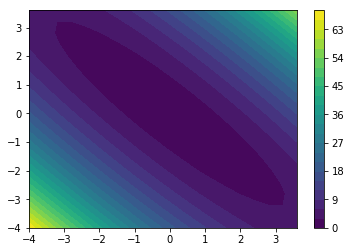

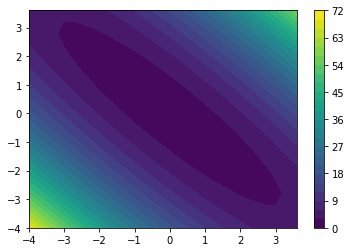

In [21]:
X,Y = gen_arti()
X_test,Y_test = gen_arti()
plot_error(X,Y, mse)
perceptron = Lineaire()
perceptron.fit(X,Y)
plot_error(X_test,perceptron.predict(X_test), mse)

Erreur : train 0.927000, test 0.906000


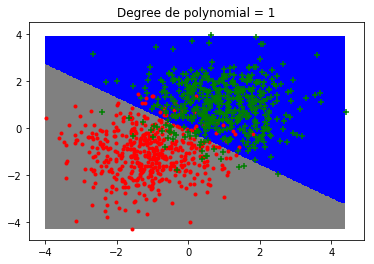

Erreur : train 0.891000, test 0.868000


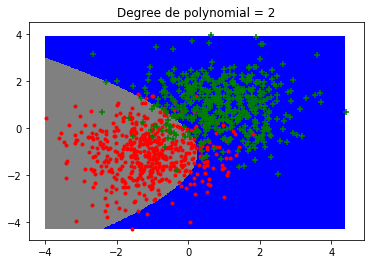

Erreur : train 0.910000, test 0.877000


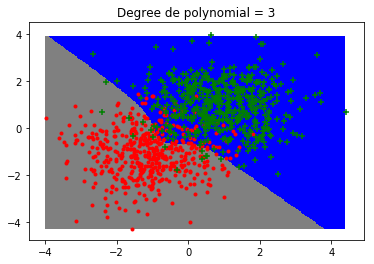

In [56]:
def plot_perceptron(trainx,trainy,testx,testy, perceptron,i):
    perceptron.fit(trainx,trainy)
    print("Erreur : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy)))
    plt.figure()
    plot_frontiere(trainx,perceptron.predict,200)
    plot_data(trainx,trainy)
    plt.title("Degree de polynomial = " + str(i))
    plt.savefig("../compte_rendu/TME1_6/images/tme4/perceptron_biais"+str(i)+".png")
    plt.show(block=True)

trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
#plt.figure()
#plot_error(trainx,trainy,mse)
#plt.figure()
#plot_error(trainx,trainy,hinge)
for i in range(1,4):
    perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1,polynomial_degree=i)
    plot_perceptron(trainx,trainy,testx,testy, perceptron,i)

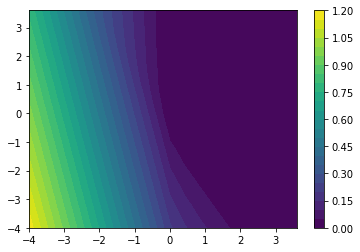

In [6]:
N = 1000
data_2d = datax[0:N, 110:112]
plot_error(data_2d, datay[0:N], hinge)
#plot_error(data_2d, datay[0:N], hinge_g)

In [13]:
X,Y = gen_arti(epsilon=1)
 # change à binaire
lin = Lineaire()
lin.fit(X,Y)
print(lin.score(X,Y))
# on a triché quand on a utilisé les donnees d'aprentissage à tester
X.shape

0.868


(1000, 2)

In [12]:
from utils import minibatch_indexes
batches = minibatch_indexes(1000, 32, shuffle=True)
batches.shape

(31, 32)

### Visualisation de W

In [65]:
from utils import filter_values, one_againt_others, minibatch_indexes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
fn = 'USPS/USPS_train.txt'
datax,datay = load_usps(fn)

In [73]:
X,Y = filter_values(datax,datay, 1,0)
lin = Lineaire(eps=0.1, max_iter=1000)
lin.fit(X,Y)
plt.imshow(lin.w.reshape((16,16)),interpolation="nearest",cmap="gray")
plt.savefig('../compte_rendu/TME1_6/images/tme4/weight_w1.png')

In [75]:
X,Y = filter_values(datax,datay, 4,9)
lin = Lineaire(eps=0.1, max_iter=1000)
lin.fit(X,Y)
plt.imshow(lin.w.reshape((16,16)),interpolation="nearest",cmap="gray")
#plt.show()
plt.savefig('../compte_rendu/TME1_6/images/tme4/weight_w49.png')

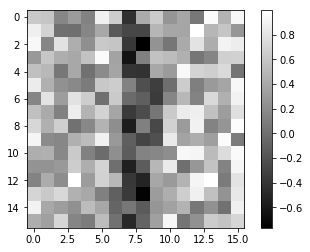

In [70]:
X,Y = filter_values(datax,datay, 1,8)
lin = Lineaire(eps=0.1)
lin.fit(X,Y)
show_usps(lin.w)

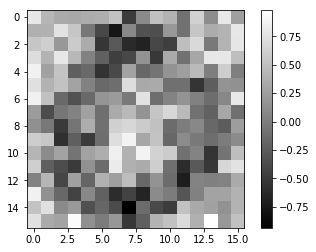

In [24]:
X,Y = filter_values(datax,datay, 0,5)
lin = Lineaire(eps=0.1)
lin.fit(X,Y)
show_usps(lin.w[1:])

Maintenant on compare un nombre contre les autres.

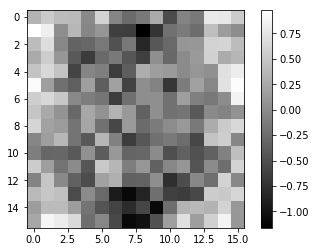

In [25]:
X,Y = one_againt_others(datax, datay, 5)
lin = Lineaire(eps=0.1)
lin.fit(X,Y)
show_usps(lin.w[1:])

### Sur apprentissage

In [37]:
number = 5
datax,datay = load_usps('USPS/USPS_train.txt')
X,Y = one_againt_others(datax,datay, number)
datax_test,datay_test = load_usps('USPS/USPS_test.txt')
X_test,Y_test = one_againt_others(datax_test,datay_test, number)

In [38]:
results_train = {}
results_test = {}
epsilons = [0.005,0.01,0.05,0.1]
iter_ns = np.linspace(1000, 30000, 10, dtype=int)
for eps in epsilons:
    print(eps)
    res_train = []
    res_test = []
    for iter_n in iter_ns:
        lin = Lineaire(eps=eps, max_iter=int(iter_n))
        lin.fit(X,Y)
        res_train.append(lin.score(X,Y))
        res_test.append(lin.score(X_test,Y_test))
    results_train[eps] = res_train
    results_test[eps] = res_test

0.005
0.01
0.05
0.1


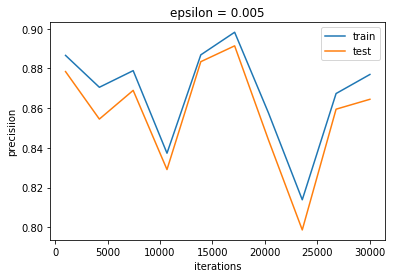

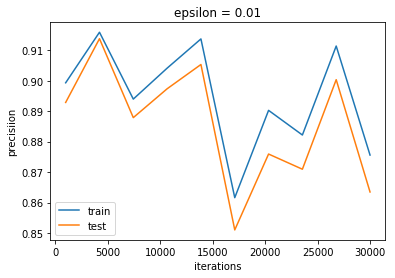

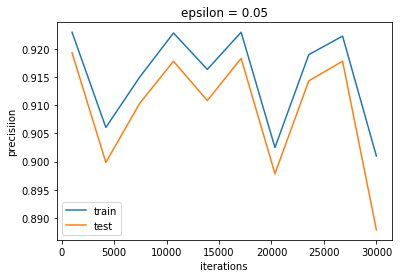

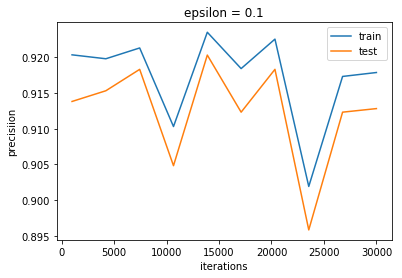

In [44]:
def eps_plot(x,y_train,y_test, eps):
    plt.figure()
    plt.title("epsilon = " + str(eps))
    plt.xlabel("iterations")
    plt.ylabel("precisiion")
    plt.plot(x, y_train, label="train")
    plt.plot(x, y_test, label="test")
    plt.legend()
    plt.show()

for eps in epsilons:
    eps_plot(iter_ns, results_train[eps], results_test[eps], eps)

Comme nous pouvons constater de cet figures, il n'y a pas grande differences entre train et test, si on fait varier le nombre des iterations.

### Biais
Nous essayons si il y a difference dans le score, quand on tiens au compte le biais.

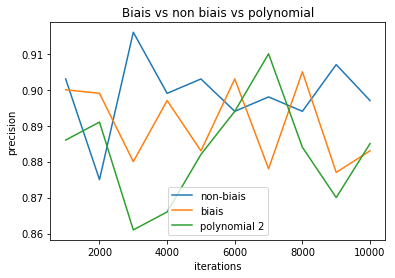

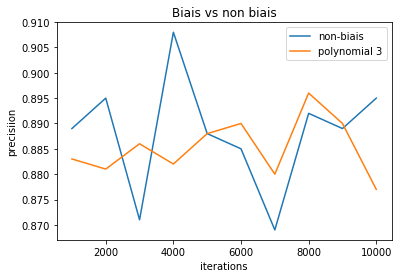

sans biais : 0.8881
avec results_poly : 0.8853


In [62]:
from cross_validation import validation_croisee

X,Y =  gen_arti(nbex=1000,data_type=0,epsilon=1)
#X_test,Y_test =  gen_arti(nbex=1000,data_type=0,epsilon=1)

results_non_biais = []
#results_biais = []
results_poly = []
iter_ns = np.linspace(1000, 10000, 10, dtype=int)
for iter_n in iter_ns:
    lin_poly = Lineaire(eps=0.05, max_iter=int(iter_n), polynomial_degree=3)
    #lin_biais = Lineaire(eps=0.05, max_iter=int(iter_n), polynomial_degree=1)
    lin_non_biais = Lineaire(eps=0.05, max_iter=int(iter_n), polynomial_degree=0)
    
    results_poly.append(validation_croisee(X,Y,lin_poly,5))
    results_biais.append(validation_croisee(X,Y,lin_biais,5))
    results_non_biais.append(validation_croisee(X,Y,lin_non_biais,5))

plt.figure()
plt.title("Biais vs non biais")
plt.xlabel("iterations")
plt.ylabel("precisiion")
plt.plot(iter_ns, results_non_biais, label="non-biais")
#plt.plot(iter_ns, results_biais, label="biais")
plt.plot(iter_ns, results_poly, label="polynomial 3")
plt.legend()
plt.show()

print("sans biais : " + str(np.mean(results_non_biais)))
#print("avec biais : " + str(np.mean(results_biais)))
print("avec results_poly : " + str(np.mean(results_poly)))

In [61]:
plt.figure()
plt.title("Biais vs non biais vs polynomial")
plt.xlabel("iterations")
plt.ylabel("precision")
plt.plot(iter_ns, results_non_biais, label="non-biais")
plt.plot(iter_ns, results_biais, label="biais")
plt.plot(iter_ns, results_poly, label="polynomial 2")
plt.legend()
plt.savefig('../compte_rendu/TME1_6/images/tme4/scores_biais_non_poly.png')

Ca semble que le biais ne permet pas classifier mieux les données test.

### Polynomial test


In [85]:
from utils import filter_values, one_againt_others
number = 4
datax,datay = load_usps('USPS/USPS_train.txt')
X,Y = one_againt_others(datax,datay, number)
datax_test,datay_test = load_usps('USPS/USPS_test.txt')
X_test,Y_test = one_againt_others(datax_test,datay_test, number)

def polynomial_test(degree):
    results_train = []
    results_test = []
    iter_ns = np.linspace(1000, 50000, 10, dtype=int)
    for iter_n in iter_ns:
        lin = Lineaire(max_iter=int(iter_n), polynomial_degree=degree)
        lin.fit(X,Y)
        results_train.append(lin.score(X,Y))
        results_test.append(lin.score(X_test,Y_test))

    plt.figure()
    plt.title("Test vs train avec polynomial "+str(degree)+" degree")
    plt.xlabel("iterations")
    plt.ylabel("precision")
    plt.plot(iter_ns, results_train, label="train")
    plt.plot(iter_ns, results_test, label="test")
    plt.legend()
    plt.savefig('../compte_rendu/TME1_6/images/tme4/USPS_polynomial_4.png')
    
polynomial_test(3)

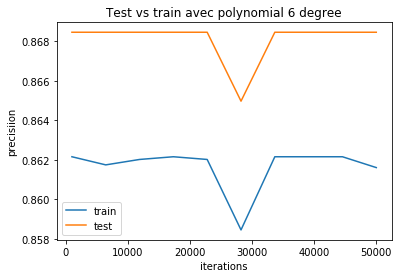

In [80]:
#polynomial_test(3)


In [83]:
plt.figure()
plt.title("Test vs train avec polynomial "+str(6)+" degree")
plt.xlabel("iterations")
plt.ylabel("precision")
plt.plot(iter_ns, results_train, label="train")
plt.plot(iter_ns, results_test, label="test")
plt.legend()
plt.show()

NameError: name 'results_train' is not defined